In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

Name: Heart Disease UCI

Source: Kaggle

https://www.kaggle.com/ronitf/heart-disease-uci/downloads/heart-disease-uci.zip/1

Attribute Information: 
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
# pd.read_csv("https://www.kaggle.com/ronitf/heart-disease-uci/downloads/heart-disease-uci.zip")

In [2]:
df = pd.read_csv("heart_mod.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,296.000000,302.000000,295.000000,291.000000,299.000000,296.000000,296.000000,294.000000,298.000000,299.000000,303.000000
mean,54.366337,0.683168,0.966997,132.459459,250.430464,0.152542,0.536082,150.193980,0.331081,1.035473,1.397959,0.728188,2.311037,0.544554
std,9.082101,0.466011,1.032052,21.088636,65.295140,0.360157,0.526443,25.055425,0.471399,1.161381,0.613941,1.026555,0.613258,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,286.000000,689.000000,1.000000,2.000000,264.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    296 non-null float64
chol        302 non-null float64
fbs         295 non-null float64
restecg     291 non-null float64
thalach     299 non-null float64
exang       296 non-null float64
oldpeak     296 non-null float64
slope       294 non-null float64
ca          298 non-null float64
thal        299 non-null float64
target      303 non-null int64
dtypes: float64(10), int64(4)
memory usage: 33.2 KB


# Data preparation

In data science it's very important to work with the correct type of data

Let's turn a few variables into categorical variables

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,296.000000,302.000000,295.000000,291.000000,299.000000,296.000000,296.000000,294.000000,298.000000,299.000000,303.000000
mean,54.366337,0.683168,0.966997,132.459459,250.430464,0.152542,0.536082,150.193980,0.331081,1.035473,1.397959,0.728188,2.311037,0.544554
std,9.082101,0.466011,1.032052,21.088636,65.295140,0.360157,0.526443,25.055425,0.471399,1.161381,0.613941,1.026555,0.613258,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,286.000000,689.000000,1.000000,2.000000,264.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
factor_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "target", "thal"]
numeric_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

## Missing values

In [7]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     7
chol         1
fbs          8
restecg     12
thalach      4
exang        7
oldpeak      7
slope        9
ca           5
thal         4
target       0
dtype: int64

In [8]:
for col in numeric_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)
    
for col in factor_columns:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)
    
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,132.402640,250.400990,0.148515,0.554455,150.217822,0.323432,1.030033,1.386139,0.716172,2.306931,0.544554
std,9.082101,0.466011,1.032052,20.846084,65.188964,0.356198,0.523777,24.889798,0.468560,1.148389,0.608499,1.022254,0.610220,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,286.000000,689.000000,1.000000,2.000000,264.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Outliers

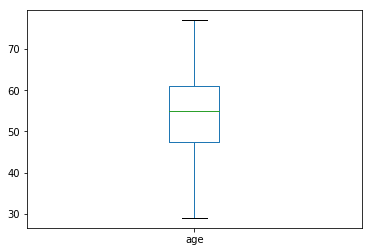

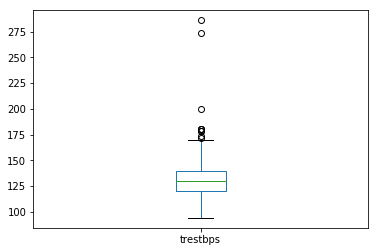

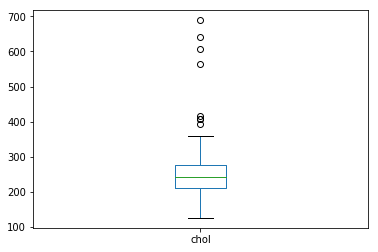

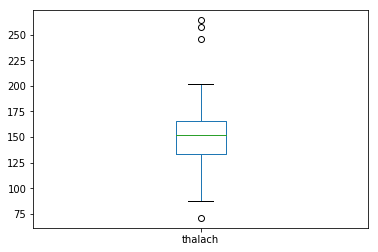

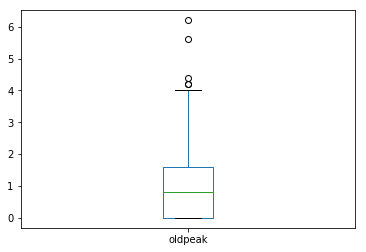

In [10]:
for col in numeric_columns:
    df[col].plot.box()
    plt.show()

In [11]:
df = df[df["trestbps"] < 225].copy()
df = df[df["chol"] < 500].copy()
df = df[df["thalach"] < 225].copy()

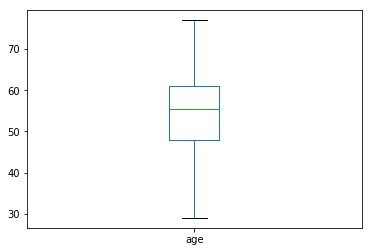

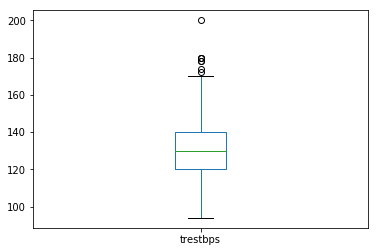

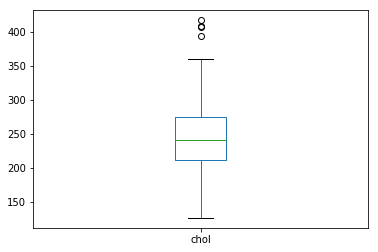

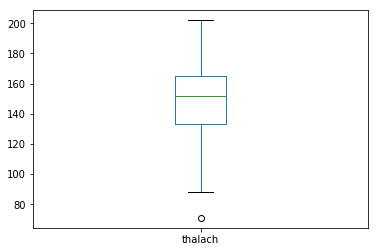

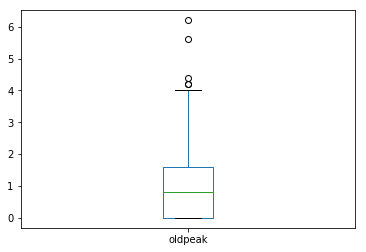

In [12]:
for col in numeric_columns:
    df[col].plot.box()
    plt.show()

Here the dataset was almost clean, we didn't have much to do.
But in general we need to be careful about:
* splitting or merging columns
* date&time caution
* text analytics on free text columns
* feature extraction
* one hot encoding categorical variables
* aggregating levels
* features engineering

The goal of this workshop is to focus on the ML part without bothering you with data manipulation details.

Note however that around 75% of a data scientist time is to collect, join and clean the data !!!

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,54.476190,0.683673,0.955782,131.370748,245.328231,0.153061,0.557823,149.316327,0.326531,1.045238,1.384354,0.721088,2.309524,0.544218
std,8.896318,0.465835,1.029306,17.104436,48.761332,0.360660,0.524216,22.562736,0.469743,1.154526,0.611516,1.023827,0.609463,0.498890
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

Before jumping to the machine learning part, let's visualize our dataset first

## Univariate analysis

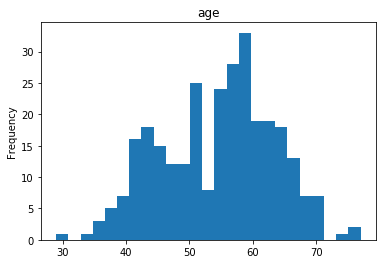

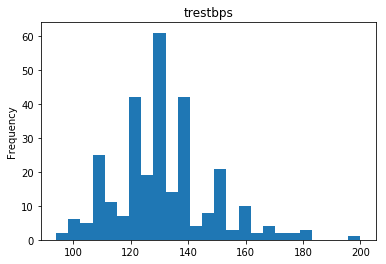

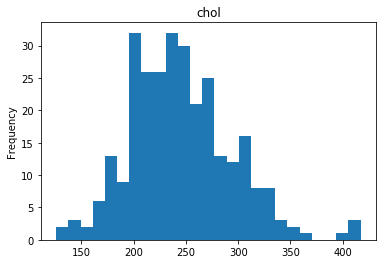

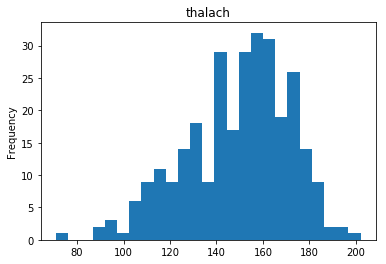

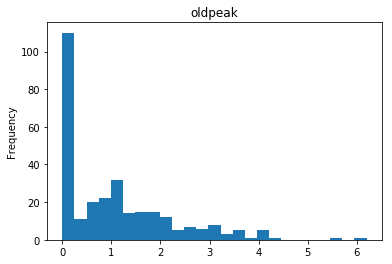

In [14]:
for x in numeric_columns:
    df[x].plot(kind="hist",bins=25)
    plt.title(x)
    plt.show()

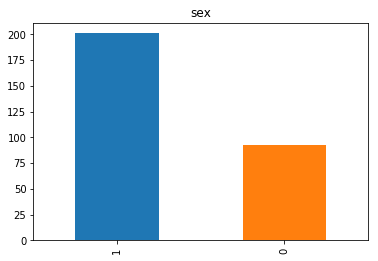

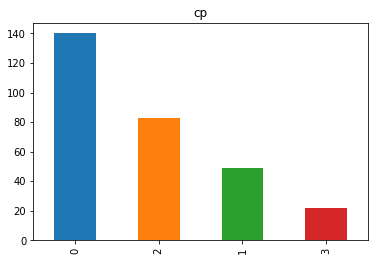

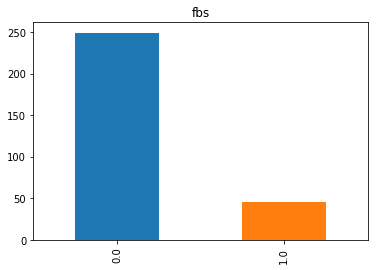

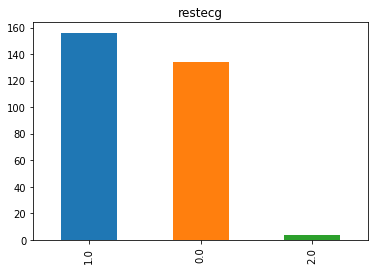

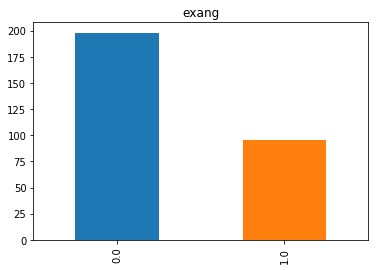

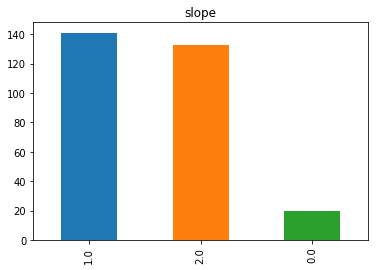

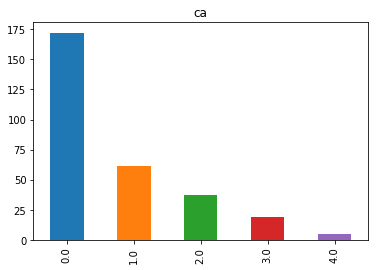

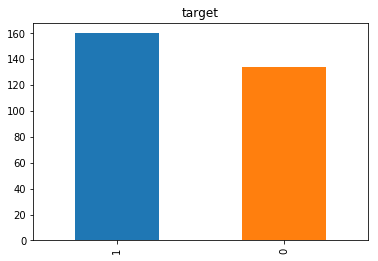

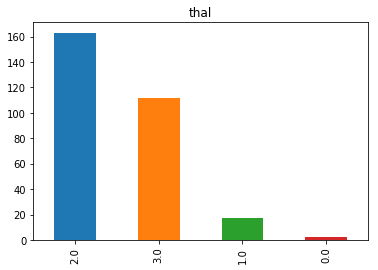

In [15]:
for x in factor_columns:
    df[x].value_counts().plot(kind="bar")
    plt.title(x)
    plt.show()

## Bivariate analysis

In [16]:
target = "target"

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


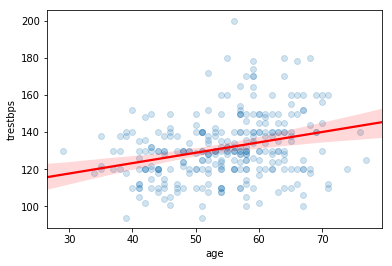

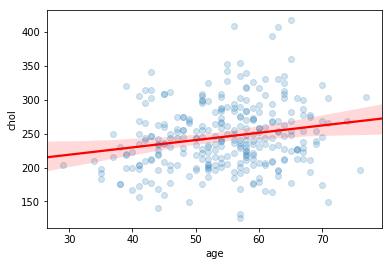

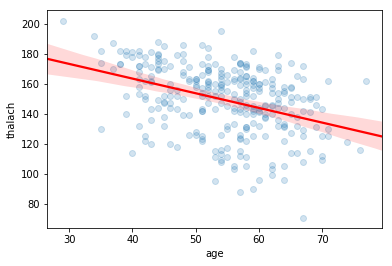

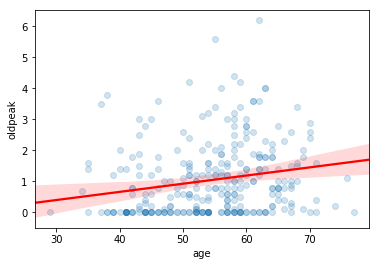

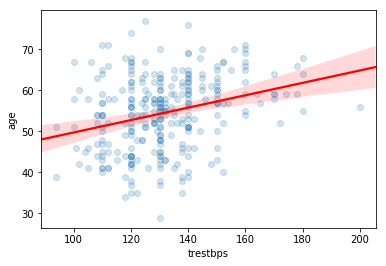

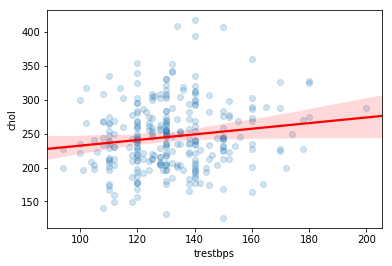

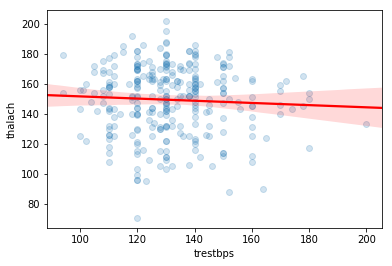

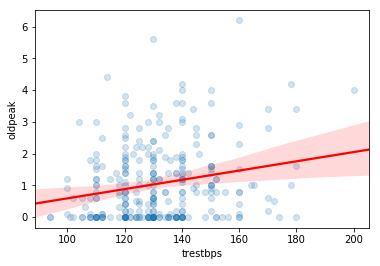

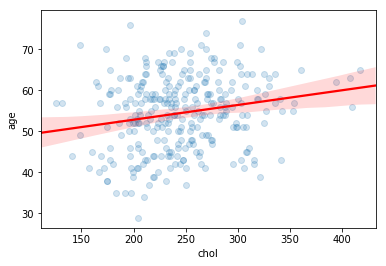

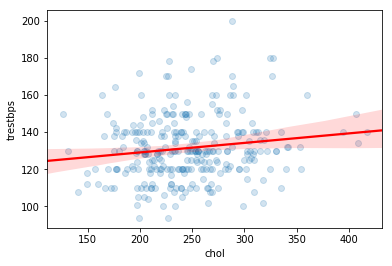

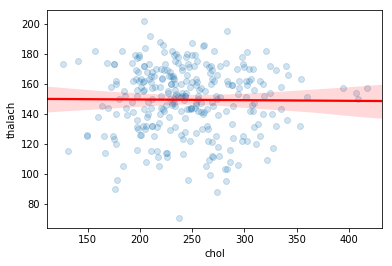

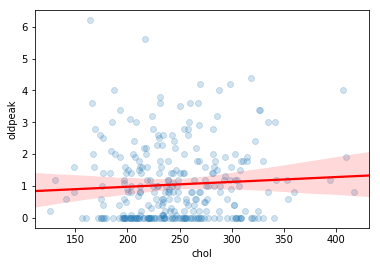

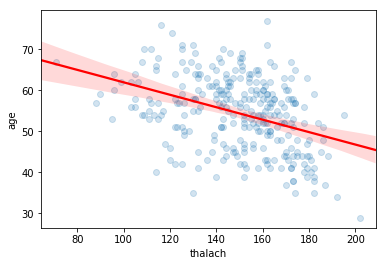

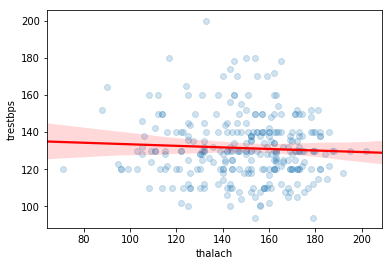

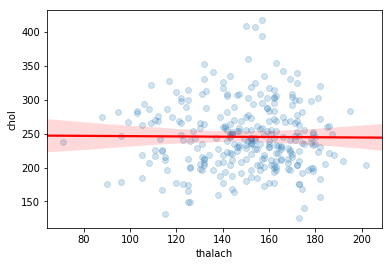

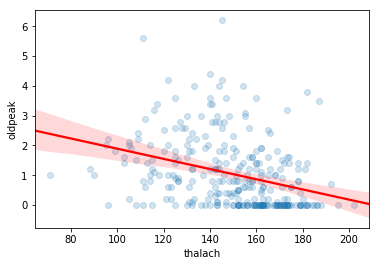

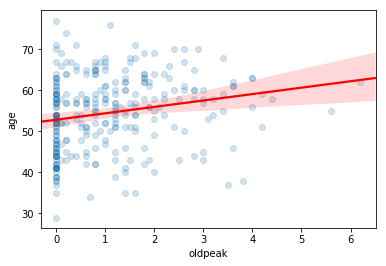

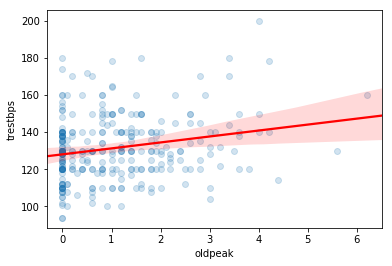

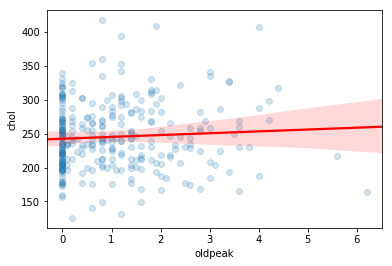

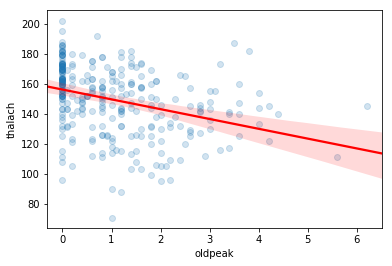

In [17]:
for x in numeric_columns:
    for y in numeric_columns:
#     if x == target: continue
        if (x != y) & (x != "thal") & (y != "thal"):
            sns.regplot(x = x, y=y, data=df,
                       x_ci = "ci",
                       scatter = True,
                       ci = 99,
                       order=1,
                       lowess = False,
                       scatter_kws={'alpha':0.2},
                       line_kws={"color":"red"})
            plt.show()

# Unsupervised Learning

## Clustering - KMeans

The goal with this first exercise it to see if the data could be grouped in some way.

Since this is an unsupervised task, there is no need to define a training and test set

Let's start by visualizing the data points

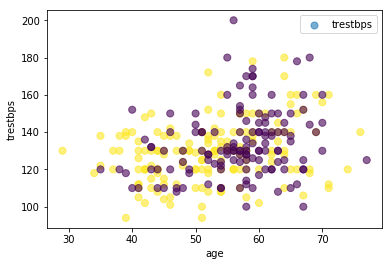

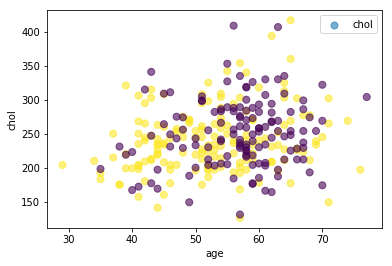

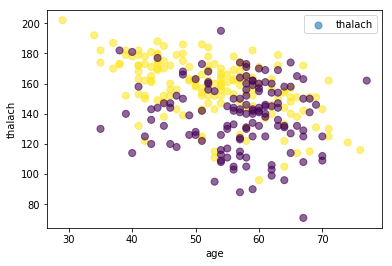

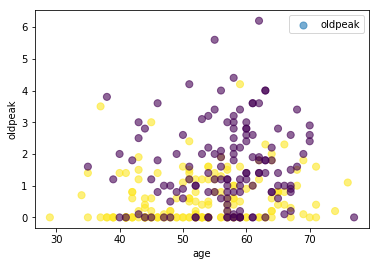

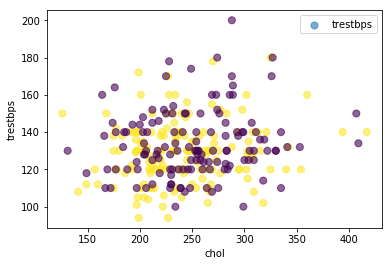

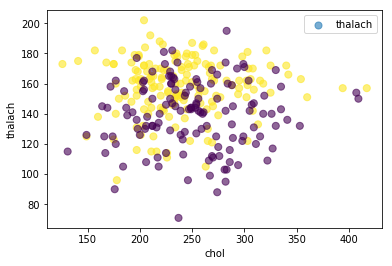

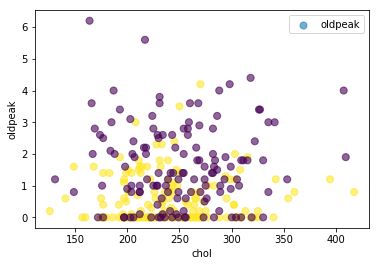

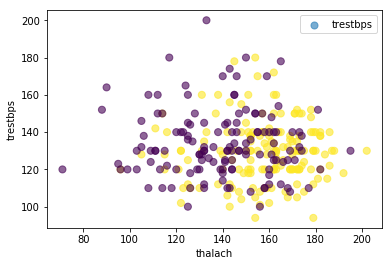

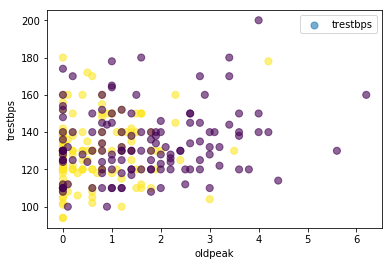

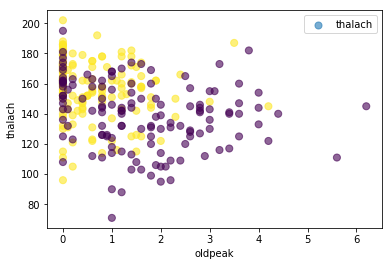

In [18]:
for col in numeric_columns:
    for col2 in numeric_columns:
        if col < col2:
            plt.scatter(df[col], df[col2], c= df["target"], s=50, alpha=0.6)
            plt.xlabel(col)
            plt.ylabel(col2)
            plt.legend()
            plt.show()

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1


### First trial

In [20]:
y = df["target"].copy()
X = df.drop(["target"], axis=1)
print(X.head())
feature_list = list(X.columns)

   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   3     145.0  233.0  1.0      0.0    150.0    0.0      2.3   
1   37    1   2     130.0  250.0  0.0      1.0    187.0    0.0      3.5   
2   41    0   1     130.0  204.0  0.0      0.0    172.0    0.0      1.4   
3   56    1   1     120.0  236.0  0.0      1.0    178.0    0.0      0.8   
4   57    0   0     120.0  354.0  0.0      1.0    163.0    1.0      0.6   

   slope   ca  thal  
0    0.0  0.0   1.0  
1    0.0  0.0   2.0  
2    2.0  0.0   2.0  
3    2.0  0.0   2.0  
4    2.0  0.0   2.0  


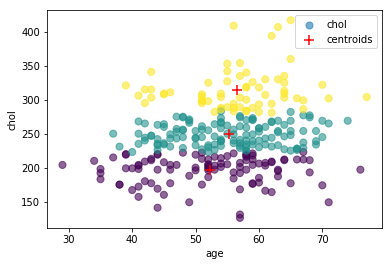

In [21]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3).fit(X)

centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns=feature_list)

clusters = model.labels_

plt.scatter(X['age'], X['chol'], c= clusters, s=50, alpha=0.6)
plt.scatter(centroids.loc[:, 'age'], centroids.loc[:, 'chol'], c='red', s=100, marker="+", label="centroids")
plt.xlabel("age")
plt.ylabel("chol")
plt.legend()

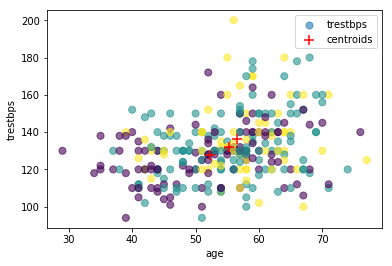

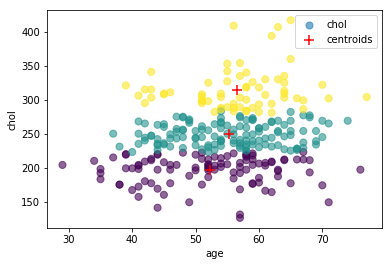

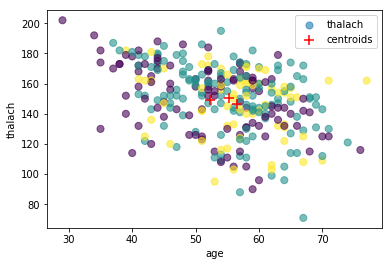

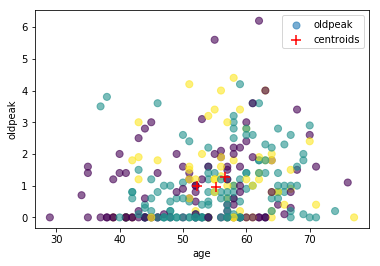

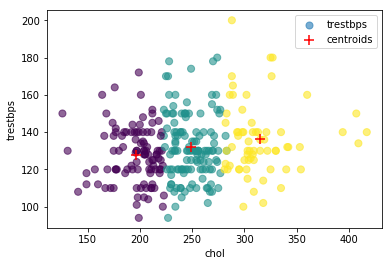

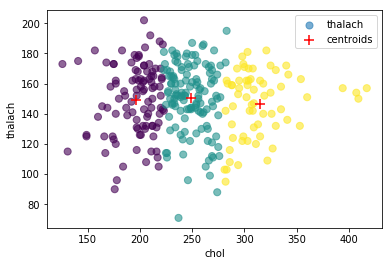

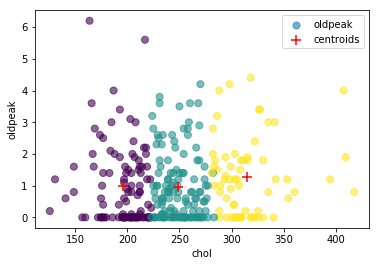

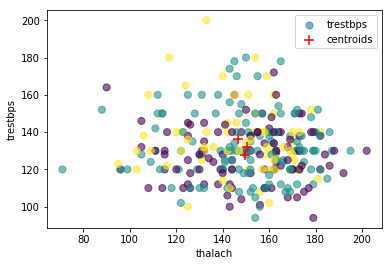

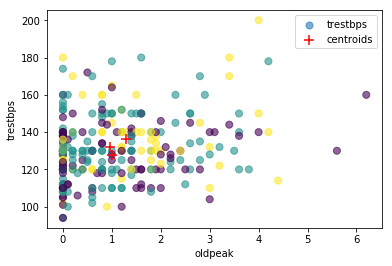

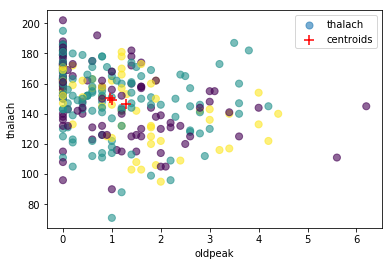

In [22]:
for col in numeric_columns:
    for col2 in numeric_columns:
        if col < col2:
            plt.scatter(X[col], X[col2], c= clusters, s=50, alpha=0.6)
            plt.scatter(centroids.loc[:, col], centroids.loc[:, col2], c='red', s=100, marker="+", label="centroids")
            plt.xlabel(col)
            plt.ylabel(col2)
            plt.legend()
            plt.show()

Let's evaluate the clusters

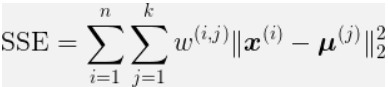

In [23]:
print("Inertia = {:.1f}".format(model.inertia_)) # SSE

Inertia = 390699.7


Optimisation: let's find the best number of clusters

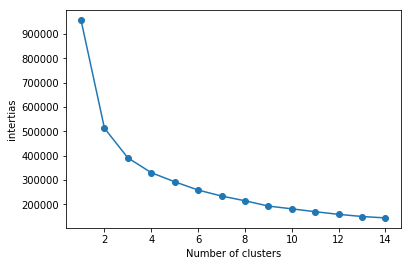

In [24]:
intertias = []

for i in range(1, 15):
    
    km = KMeans(
        n_clusters=i,
        random_state=0
    )
    km.fit(X)
    intertias.append(km.inertia_)

# plot
plt.plot(range(1, 15), intertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('intertias')
plt.show()

Let's rerun with 2 clusters

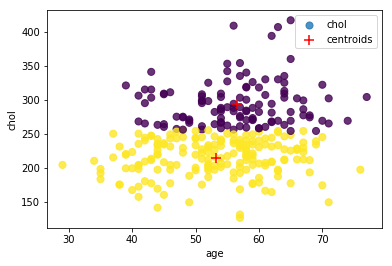

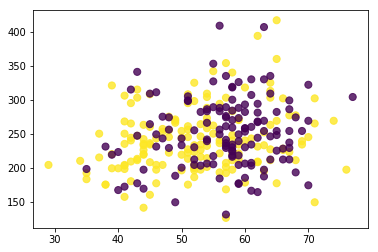

In [26]:
model = KMeans(n_clusters=2).fit(X)

centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns=X.columns)

clusters = model.labels_



plt.scatter(X['age'], X['chol'], c= clusters, s=50, alpha=0.8)
plt.scatter(centroids.loc[:, 'age'], centroids.loc[:, 'chol'], c='red', s=100, marker="+", label="centroids")
plt.xlabel("age")
plt.ylabel("chol")
plt.legend()

plt.show()

plt.scatter(df['age'], df['chol'], c= df["target"], s=50, alpha=0.8)
plt.show()


It seems like with the clustering we didn't manage to capture the benign/malign status of the tumor. 

Let's try differently

### Second trial

If we look at the data, we can see that they are not on the same scale, so we need to standardize before in order not to bias the distance computations

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_scaled = X.copy()

X_norm = pd.DataFrame(sc.fit_transform(X))

X_scaled = X_norm
X_scaled.columns = feature_list
X_scaled.head()


/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.959761,0.680211,1.989401,0.798184,-0.253259,2.352304,-1.065924,0.030353,-0.696311,1.088673,-2.267665,-0.705507,-2.152316
1,-1.967779,0.680211,1.016217,-0.080277,0.095972,-0.425115,0.844940,1.673021,-0.696311,2.129833,-2.267665,-0.705507,-0.508729
2,-1.517388,-1.470133,0.043032,-0.080277,-0.849007,-0.425115,-1.065924,1.007074,-0.696311,0.307803,1.008470,-0.705507,-0.508729
3,0.171577,0.680211,0.043032,-0.665917,-0.191630,-0.425115,0.844940,1.273453,-0.696311,-0.212777,1.008470,-0.705507,-0.508729
4,0.284175,-1.470133,-0.930153,-0.665917,2.232446,-0.425115,0.844940,0.607506,1.436141,-0.386303,1.008470,-0.705507,-0.508729


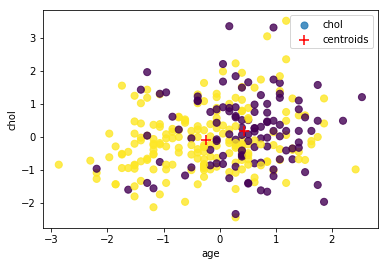

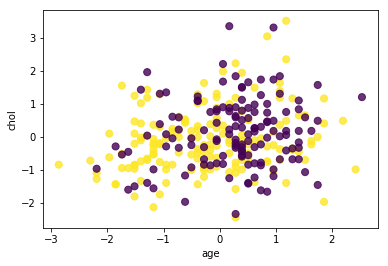

In [28]:
model = KMeans(n_clusters=2).fit(X_scaled)

centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns=X_scaled.columns)

clusters = model.labels_

plt.scatter(X_scaled['age'], X_scaled['chol'], c= clusters, s=50, alpha=0.8)
plt.scatter(centroids.loc[:, 'age'], centroids.loc[:, 'chol'], c='red', s=100, marker="+", label="centroids")
plt.xlabel("age")
plt.ylabel("chol")
plt.legend()

plt.show()

plt.scatter(X_scaled['age'], X_scaled['chol'], c= y, s=50, alpha=0.8)
plt.xlabel("age")
plt.ylabel("chol")
plt.show()

This looks much better now. 
Let's compute some similarity matrix

In [29]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y, clusters))

print(accuracy_score(y, clusters))

              precision    recall  f1-score   support

           0       0.88      0.69      0.78       134
           1       0.78      0.92      0.84       160

   micro avg       0.82      0.82      0.82       294
   macro avg       0.83      0.81      0.81       294
weighted avg       0.83      0.82      0.81       294

0.8163265306122449


## Hierarchical clustering

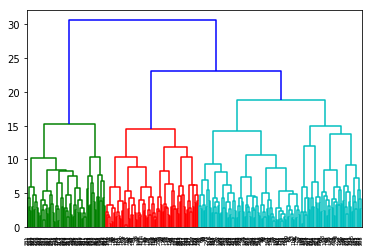

2


In [30]:
# Import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.show()

# Create clusters and fit
hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
hc.fit(X_scaled)

print(hc.n_clusters)

## Principal Component Analysis

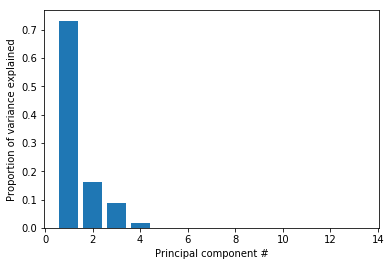

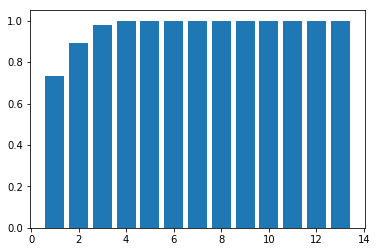

In [31]:
from sklearn.decomposition import PCA
pca = PCA()

# Fit the standardized data to the pca
pca.fit(X)

# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
# plt.xticks([1, 2, 3])
plt.show()
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum())
plt.show()

In [32]:
k= 4

pca = PCA(n_components=k)
X_pca = pca.fit_transform(X)
principalDf = pd.DataFrame(data = X_pca
             , columns = ["PCA " + str(n) for n in range(1,k+1)])

finalDf = pd.concat([principalDf, y], axis = 1)

In [33]:
finalDf.head()

,PCA 1,PCA 2,PCA 3,PCA 4,target
0,-11.178305,2.624561,15.361191,6.626421,1.0
1,3.615043,-40.125804,1.285531,-10.991016,1.0
2,-41.997560,-23.838019,2.563675,-8.211181,1.0
3,-10.142993,-28.864135,-6.424552,8.031896,1.0
4,107.720498,-16.502971,-15.658865,3.425013,1.0


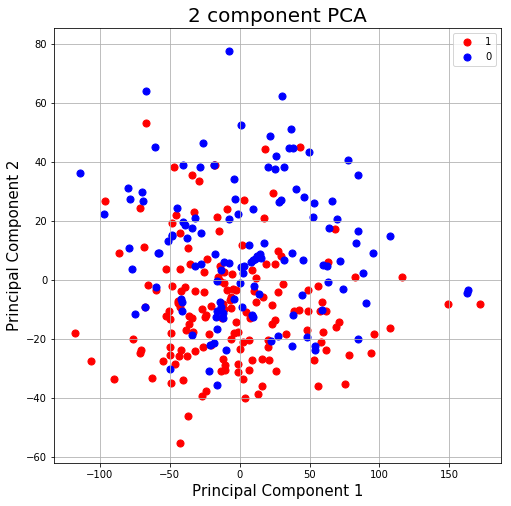

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA 1']
               , finalDf.loc[indicesToKeep, 'PCA 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

# Going further

Here is a list of topic you could be interested in if you want to go further in unsupervised learning

* DBScan 
* t-SNE 
* text analytics (word embeddings)
* anomaly detection 
